# Comparação: PCA vs Autoencoder

### Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


### Dataset

 O conjunto de dados MNIST é carregado.

 O MNIST é um conjunto de imagens de dígitos escritos à mão, comumente usado para tarefas de reconhecimento de dígitos. As imagens são normalizadas dividindo os valores de pixel por 255 para colocá-los no intervalo [0, 1] e, em seguida, são remodeladas para um formato adequado para as operações subsequentes.

In [2]:
# Carregando o conjunto de dados MNIST
(train_images, _), (test_images, _) = mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))


11490434/11490434 [==============================] - 0s 0us/step


### PCA

Processo de redução de dimensionalidade usando o PCA.

Um objeto PCA é criado com 32 componentes principais desejados e é ajustado aos dados de treinamento. Em seguida, as imagens de treinamento são transformadas para o espaço dos componentes principais usando transform, e as imagens reconstruídas são obtidas aplicando a transformação inversa com inverse_transform.

In [3]:
# Redução de dimensionalidade com PCAhttps://www.google.com/imgres?imgurl=https%3A%2F%2Fmiro.medium.com%2Fmax%2F1400%2F1*8jI3wB41kYxP-Wo5rO_Yvg.gif&tbnid=TuV4EfsVln9anM&vet=12ahUKEwjJqczq7byBAxWzrZUCHc37BAgQMygBegQIARBb..i&imgrefurl=https%3A%2F%2Fwww.programaria.org%2Finteligencia-artificial-tudo-que-voce-precisa-saber-para-comecar-a-explorar-esse-universo%2F&docid=qn9M_hHzEhDkYM&w=1240&h=698&q=mnist%20neuronios%20gif&client=firefox-b-d&ved=2ahUKEwjJqczq7byBAxWzrZUCHc37BAgQMygBegQIARBb
pca = PCA(n_components=32)  # Defina o número de componentes principais desejados
pca.fit(train_images)
reduced_train_images_pca = pca.transform(train_images)
reconstructed_train_images_pca = pca.inverse_transform(reduced_train_images_pca)


### Autoencoder

Modelo de Autoencoder é criado usando o Keras. O modelo possui uma camada de entrada com 784 neurônios (correspondendo ao número de pixels em uma imagem MNIST), uma camada codificadora com 32 neurônios e ativação ReLU, e uma camada decodificadora com 784 neurônios e ativação sigmoid. O modelo é compilado com o otimizador 'adam' e a função de perda 'binary_crossentropy'.

In [4]:
# Criando um modelo de autoencoder simples
input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


### Treinamentos

In [5]:
# Treinando o autoencoder
autoencoder.fit(train_images, train_images, epochs=50, batch_size=256, shuffle=True, validation_data=(test_images, test_images))
# Reconstruindo imagens usando o autoencoder
reconstructed_train_images_autoencoder = autoencoder.predict(train_images)


Epoch 1/50
235/235 [==============================] - 6s 19ms/step - loss: 0.2779 - val_loss: 0.1911
Epoch 2/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1703 - val_loss: 0.1531
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1440 - val_loss: 0.1334
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1285 - val_loss: 0.1216
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1186 - val_loss: 0.1134
Epoch 6/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1115 - val_loss: 0.1073
Epoch 7/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1065 - val_loss: 0.1031
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1028 - val_loss: 0.0999
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0999 - val_loss: 0.0975
Epoch 10/50
235/235 [==============================] - 3s 15ms/step - loss: 0.0979 - val_lo

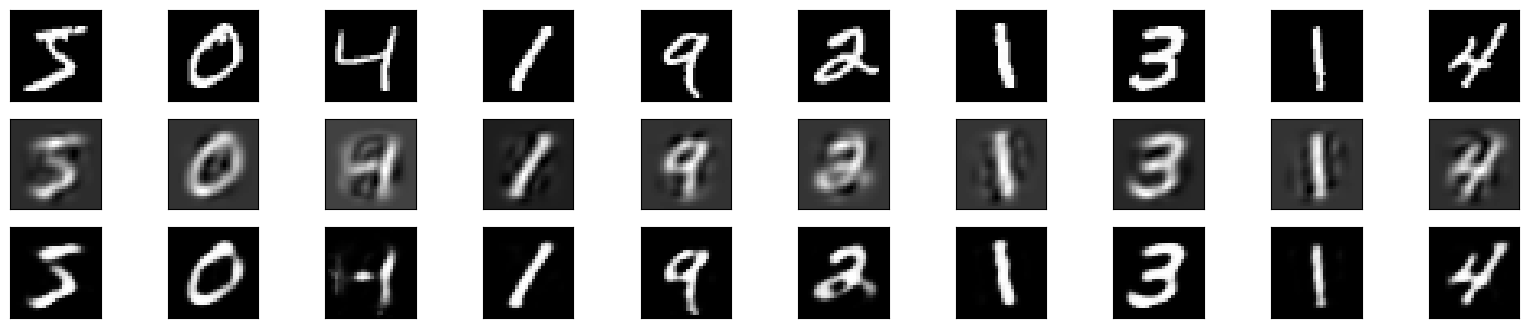

In [6]:
# Plotando imagens originais, PCA e autoencoder
n = 10  # Número de imagens para plotar
plt.figure(figsize=(20, 4))

for i in range(n):
    # Imagem original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(train_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem reconstruída pelo PCA
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_train_images_pca[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem reconstruída pelo autoencoder
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(reconstructed_train_images_autoencoder[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
